In [8]:
%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import numpy.linalg as LA
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
import Utils.TaggedRowVecs as trv
import Utils.TrvPlot as trvPlt

In [44]:
RS = 12345
def TSNEtrv(tvs:trv.TaggedRowVecs, perplexity:float=30):
    proj = TSNE(n_components=2, random_state=RS, perplexity=perplexity).fit_transform(tvs.row_vecs)
    return trv.TaggedRowVecs(row_vecs=proj, tags=tvs.tags)

#### SVD reduce the digits data

In [10]:
digits = load_digits()
Ud, sigmad, Vd = np.linalg.svd(digits.data)

In [39]:
comp = 20
reconstimg = np.matrix(Ud[:, :comp]) * np.diag(sigmad[:comp]) * np.matrix(Vd[:comp, :])
trvRec = trv.TaggedRowVecs(row_vecs = reconstimg, tags = digits.target)

#### TSNE with perplexity = 30

In [40]:
trvRes = TSNEtrv(tvs=trvRec)

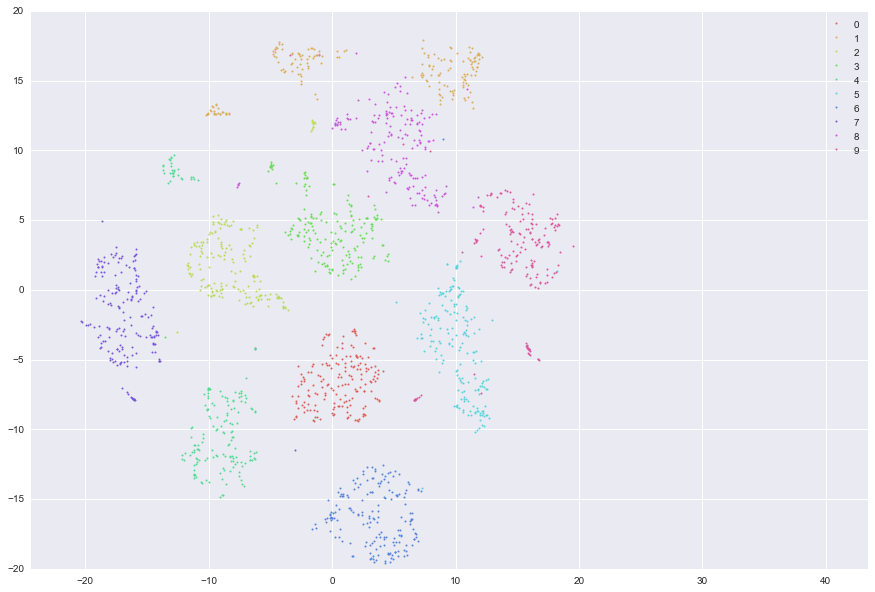

In [41]:
resGg = trvPlt.PlotTrvs(
                trvRes, 
                figsize=(15,10), 
                markersize=2,
                tag_extractor=lambda x: x,
                showLegend=True)

#### TSNE with perplexity = 60

In [55]:
trvRes2 = TSNEtrv(tvs=trvRec, perplexity=20)

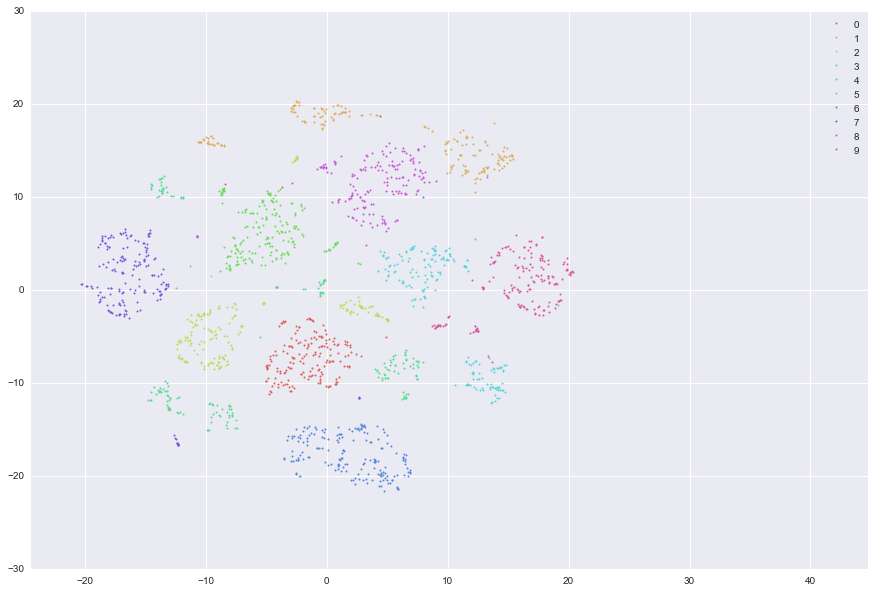

In [56]:
resGg = trvPlt.PlotTrvs(
                trvRes2, 
                figsize=(15,10), 
                markersize=2,
                tag_extractor=lambda x: x,
                showLegend=True)